# Repeating the Tensorflow Playground Exercise in Python

In this notebook, we will reproduce the Tensorflow Playground exercise we did earlier using this tool:  

https://playground.tensorflow.org/

We won't get exactly the same results as the underlying libraries used are different.  But you should be able to tie what we are doing in code here with what we did in the playground.


## Imports
Import the libraries we will need

In [1]:
# Import core libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Import Tensorflow functionality we need
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# Library of functions for this course
from dasinn_library import *

## Create data set
We don't have access to the Tensorflow data sets, so let's fake them using some code. 

In [3]:
# Create the data sets
trainSet = createDataSet1(100)
testSet = createDataSet1(100)

Let's plot them.  First set up a colour palette, so aliens are orange and humans are blue:

In [4]:
colors = ["orange", "royalblue"]
p = sns.color_palette(colors)
sns.set_palette(p)

Plot the data set:

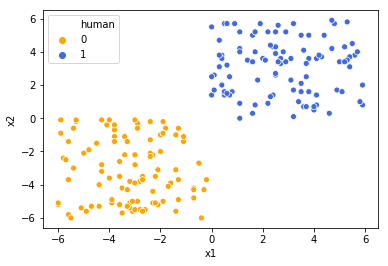

In [5]:
sns.scatterplot('x1', 'x2', data=trainSet, hue='human')

Hopefully you will see that this is similar tthe data set used in the Playground.

## Build the neural network
Now let's build the neural network model  

Don't forget, this is what we intend to build:
![image.png](https://www.thinkcreatelearn.co.uk/eximg/tf-playground-1.jpg)

This requires one neuron with 2 inputs.  The completed network of one neuron will look like this:
![image.png](https://www.thinkcreatelearn.co.uk/eximg/one-neuron.jpg)
- The 2 inputs are x1 and x2.
- The weights and bias are w1, w2 and b.  Tensorflow will train the network based on our training data and tune these weights.
- The output decision (alien or human) is a.

The following links to documentation may help:

Sequential
https://www.tensorflow.org/api_docs/python/tf/keras/Sequential


Model (Sequential() is based on this)
https://www.tensorflow.org/api_docs/python/tf/keras/Model

Dense
https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense

A dense layer is a fully-connected layer.  All neurons in the previous layer are connected to all neurons in the next layer.  For this simple 1-neuron case, it's not really "dense" but that's just the way the syntax to construct things is.


In [6]:
# Prepare a stack of layers
model = Sequential()

# Add a layer consisting of one unit being fed from the 2 inputs
# We want 1 neuron (units=1)
# We have 2 inputs, x1 and x2 (input_dim=2)
# Use the linear activation function
model.add(Dense(units=1, input_dim=2, activation='linear'))

# Create a gradient descent optimiser (others are available)
# Set the learning rate (lr)
sgd = SGD(lr=1)

# Now build the model, selecting a loss function and a list of metrics to evaluate
# Loss is the measure of the error in our model's predictions.  Binary Cross Entropy is one way to compute this
# Accuracy is simply the percentage of accurate predictions (aliens or humans)
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])

Let's take a look at what was created.

See https://www.tensorflow.org/js/guide/models_and_layers for some guidance

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


**Output Shape** is the number of neurons.  The first None is the batch size, and can be ignored.

**Param #** is the total number of parameters that are tweakable in the layer (we have 2 weights and 1 bias)


## Train the Model
Now we can train the model.

First we need to separate out the inputs (X) and output (y) for both our training and test data.

In [8]:
# Split out X and y
X_train = trainSet[['x1','x2']].to_numpy()
X_test = testSet[['x1','x2']].to_numpy()
y_train = trainSet[['human']].to_numpy()
y_test = testSet[['human']].to_numpy()

Now we can train the model.  We do this by feeding the data into the neural network, one batch at a time.  The batch size is the number of examples (rows of data representing aliens or humans) fed into the network at once.

We specify the number of epochs, where one epoch is one run of the entire training data set through the network.

In [9]:
# Train the model using the training data
model.fit(X_train, y_train, batch_size=10, epochs=100)

Train on 200 samples
Epoch 1/100
200/200 [==============================] - 0s 2ms/sample - loss: 0.1619 - accuracy: 0.9850
Epoch 2/100
200/200 [==============================] - 0s 135us/sample - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3/100
200/200 [==============================] - 0s 135us/sample - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/100
200/200 [==============================] - 0s 135us/sample - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/100
200/200 [==============================] - 0s 135us/sample - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 6/100
200/200 [==============================] - 0s 120us/sample - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 7/100
200/200 [==============================] - 0s 110us/sample - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/100
200/200 [==============================] - 0s 130us/sample - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/100
200/200 [==============================] - 0s 125us/sample - loss: 0.0000e+00 - accuracy: 1.0000
Epoc

## Evaluate the model
Now the model is trained, we can evaluate it using the test data.

See the documentation here for help:

https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate

In [10]:
# Evaluate using the test data
score = model.evaluate(X_test, y_test, verbose=0)
print(model.metrics_names)
print(score)

['loss', 'accuracy']
[0.0018809609115123748, 1.0]


We can also see the individual predictions made.

See the documentation here for help:

https://www.tensorflow.org/api_docs/python/tf/keras/Model#predict

In [11]:
# Get the predictions (aliens=1, humans=0)
predictions = model.predict(X_test)
predictions

array([[-11.194621  ],
       [-16.984524  ],
       [ -4.9840755 ],
       [-17.407848  ],
       [ -3.0255308 ],
       [ -8.255464  ],
       [ -7.8080244 ],
       [-17.059542  ],
       [-11.502736  ],
       [-14.616047  ],
       [-12.587843  ],
       [ -7.692816  ],
       [-14.892014  ],
       [-17.793663  ],
       [ -3.6015735 ],
       [-16.137875  ],
       [-12.48603   ],
       [ -6.9185057 ],
       [ -9.546872  ],
       [-15.288543  ],
       [ -9.463813  ],
       [-16.754105  ],
       [ -5.2520022 ],
       [ -4.461617  ],
       [ -6.0745363 ],
       [-11.408963  ],
       [ -1.755557  ],
       [ -4.582186  ],
       [ -7.6017222 ],
       [ -2.5620167 ],
       [ -8.603769  ],
       [-15.007222  ],
       [ -7.0926585 ],
       [-10.42031   ],
       [-11.907307  ],
       [ -3.6792727 ],
       [ -8.1215    ],
       [-13.348753  ],
       [-15.07688   ],
       [-11.524171  ],
       [-12.796825  ],
       [-16.116438  ],
       [-16.346855  ],
       [-13

Note that these predictions are percentages between 0 (alien) and 1 (human).  Read it as the percentage confidence that the example data is a human.

Let's turn this into a 0 or 1 by applying a threshold:

In [12]:
predictions = (model.predict(X_test) > 0.5).astype("int32") 

Let's see this in a more friendly form, so we can see x1, x2 and the predictions and actuals together:

In [13]:
# Convert the Numpy data to a Pandas dataframe
df = pd.DataFrame(np.column_stack((X_test, predictions, y_test)), columns=["x1","x2","prediction", "actual"])

# Display it
df

,x1,x2,prediction,actual
0,-4.0,-3.1,0.0,0.0
1,-4.8,-5.4,0.0,0.0
2,-2.1,-1.2,0.0,0.0
3,-4.8,-5.6,0.0,0.0
4,-0.4,-1.2,0.0,0.0
...,...,...,...,...
195,3.7,0.0,1.0,1.0
196,0.0,1.3,1.0,1.0
197,1.2,2.5,1.0,1.0
198,1.6,0.3,1.0,1.0


And let's plot the test data:

In [ ]:
sns.scatterplot('x1', 'x2', data=df, hue='prediction')

## Inspect the Model
We can take a look at the weights and bias that the model has learnt:

In [ ]:
# Get the weights on the inputs
model.get_weights()[0]

In [ ]:
# Get the bias on the neuron
model.get_weights()[1]